In [1]:
file_main <- 'main_df_toR.csv'
df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
print(dim(df_main))
df_main

[1] 243 118


fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_LOF_PLI_cds,count_LOF_LOEUF_cds,count_LOF_LOWPLI_cds,count_LOWPLI_cds,count_LOWPLI_utr,count_LOWPLI_intron,count_LOF_PLIp9_cds,count_PLIp9_cds,count_PLIp9_utr,count_PLIp9_intron
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,2,1,63,77,55,1499,3,5,9,726
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,0,0,60,70,21,895,0,1,6,421
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,1,0,47,53,40,1316,1,4,11,620
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,8,11,11,318,0,1,1,142
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,1,0,40,47,25,782,1,3,7,370
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,0,0,29,42,28,983,0,3,8,406
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,1,0,65,74,33,1182,1,3,9,574
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,0,0,53,62,38,1163,0,2,9,541
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,2,1,51,58,35,1232,2,3,9,607


In [6]:
sum(df_main$Platform == "ONT")

[1] 101

In [2]:
library(survival)
help(clogit)

Warning message:
“package ‘survival’ was built under R version 4.3.3”


clogit {survival},R Documentation
formula,Model formula
data,data frame
weights,"optional, names the variable containing case weights"
subset,"optional, subset the data"
na.action,optional na.action argument. By default the global option na.action is used.
method,use the correct (exact) calculation in the conditional likelihood or one of the approximations
...,"optional arguments, which will be passed to coxph.control"


In [3]:
#fts = list('LOF_DEV_BR_10_cds', 'LOF_PLI_cds', 'PLI_cds', 'PLI_utr', 'PLI_intron',
#           'LOF_LOWPLI_cds', 'LOWPLI_cds', 'LOWPLI_utr', 'LOWPLI_intron')
fts = list('LOF_DEV_BR_10_cds', 'LOF_PLIp9_cds', 'PLIp9_cds', 'PLIp9_utr', 'PLIp9_intron',
           'LOF_LOWPLI_cds', 'LOWPLI_cds', 'LOWPLI_utr', 'LOWPLI_intron')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + Platform + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
#for (ft in fts[c(1:1)]) {
for (ft in fts) {
    var = paste('count_', ft, sep="")
    print(var)
    
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + Platform + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    
    null_model <- clogit(null_formula, data = df_main)
    #print(summary(null_model))

    clogit_model <- clogit(model_formula, data = df_main)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
    
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
    #print(str(summary(ano)))
    #print(ano)
    #print(str(ano))
}

print(ORs)
print(ORs_plus)
print(ORs_minus)
print(log_ORs)
print(log_ORs_plus)
print(log_ORs_minus)
print(pvals)
print(ano_pvals)

[1] "count_LOF_DEV_BR_10_cds"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] "count_LOF_PLIp9_cds"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] "count_PLIp9_cds"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] "count_PLIp9_utr"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] "count_PLIp9_intron"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] "count_LOF_LOWPLI_cds"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] "count_LOWPLI_cds"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] "count_LOWPLI_utr"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] "count_LOWPLI_intron"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; beta may be infinite. ”


[1] 1.2717579 1.0902586 1.1135488 1.0194549 0.9992305 0.9927338 0.9945042
[8] 1.0015725 0.9996523
[1] 1.620940 1.377268 1.334467 1.214083 1.002959 1.019595 1.018591 1.052596
[9] 1.001381
[1] 0.9977968 0.8630590 0.9292028 0.8560271 0.9955153 0.9665798 0.9709868
[8] 0.9530223 0.9979267
[1]  0.2404001415  0.0864148901  0.1075519890  0.0192680818 -0.0007698283
[6] -0.0072927292 -0.0055109164  0.0015712639 -0.0003477135
[1] 0.3641808773 0.2056451886 0.1998905589 0.1084132690 0.0011306783
[6] 0.0063293043 0.0066992673 0.0269228800 0.0005337951
[1]  0.116619406 -0.032815408  0.015213419 -0.069877105 -0.002670335
[6] -0.020914763 -0.017721100 -0.023780352 -0.001229222
[1] 0.05211954 0.46859136 0.24411740 0.82887651 0.68542989 0.59239905 0.65174617
[8] 0.95057968 0.69324678
[1] 0.04554808 0.46514704 0.23979940 0.82908493 0.68332650 0.59187736 0.65156638
[8] 0.95060833 0.69133997


In [4]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”


In [5]:
#my_data = data.frame('ests' = ests, 'stds' = stds, 'fts' = unlist(fts), 'glm_pval' = pvals, 'ano_pval' = ano_pvals)
my_data = data.frame('ORs' = ORs, 'ORs_plus' = ORs_plus, 'ORs_minus' = ORs_minus,  
                     'log_ORs' = log_ORs, 'log_ORs_plus' = log_ORs_plus, 'log_ORs_minus' = log_ORs_minus,  
                     'fts' = unlist(fts), 'clogit_pval' = pvals, 'ano_pval' = ano_pvals)
my_data$fts <- factor(my_data$fts, levels = my_data$fts)
my_data

ORs,ORs_plus,ORs_minus,log_ORs,log_ORs_plus,log_ORs_minus,fts,clogit_pval,ano_pval
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1.2717579,1.620940,0.9977968,0.2404001415,0.3641808773,0.116619406,LOF_DEV_BR_10_cds,0.05211954,0.04554808
1.0902586,1.377268,0.8630590,0.0864148901,0.2056451886,-0.032815408,LOF_PLIp9_cds,0.46859136,0.46514704
1.1135488,1.334467,0.9292028,0.1075519890,0.1998905589,0.015213419,PLIp9_cds,0.24411740,0.23979940
1.0194549,1.214083,0.8560271,0.0192680818,0.1084132690,-0.069877105,PLIp9_utr,0.82887651,0.82908493
0.9992305,1.002959,0.9955153,-0.0007698283,0.0011306783,-0.002670335,PLIp9_intron,0.68542989,0.68332650
0.9927338,1.019595,0.9665798,-0.0072927292,0.0063293043,-0.020914763,LOF_LOWPLI_cds,0.59239905,0.59187736
0.9945042,1.018591,0.9709868,-0.0055109164,0.0066992673,-0.017721100,LOWPLI_cds,0.65174617,0.65156638
1.0015725,1.052596,0.9530223,0.0015712639,0.0269228800,-0.023780352,LOWPLI_utr,0.95057968,0.95060833
0.9996523,1.001381,0.9979267,-0.0003477135,0.0005337951,-0.001229222,LOWPLI_intron,0.69324678,0.69133997


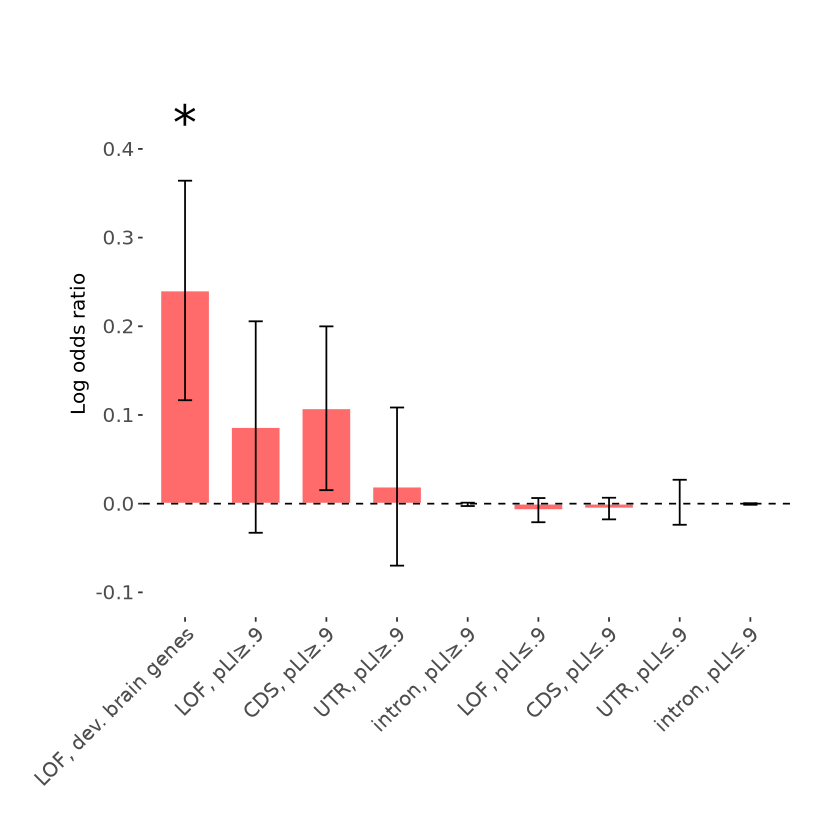

In [7]:
#x_labels = c("LOF, dev. brain genes", 
#             "LOF, pLI≥.99 genes", "CDS, pLI≥.99 genes", "UTR, pLI≥.99 genes", "intron, pLI≥.99 genes", 
#             "LOF, pLI≤.9 genes", "CDS, pLI≤.9 genes", "UTR, pLI≤.9 genes", "intron, pLI≤.9 genes")
#x_labels = c("LOF, dev. brain genes", 
#             "LOF, pLI≥.99", "CDS, pLI≥.99", "UTR, pLI≥.99", "intron, pLI≥.99", 
#             "LOF, pLI≤.9", "CDS, pLI≤.9", "UTR, pLI≤.9", "intron, pLI≤.9")
x_labels = c("LOF, dev. brain genes", 
             "LOF, pLI≥.9", "CDS, pLI≥.9", "UTR, pLI≥.9", "intron, pLI≥.9", 
             "LOF, pLI≤.9", "CDS, pLI≤.9", "UTR, pLI≤.9", "intron, pLI≤.9")

#ggplot(my_data, aes(x = fts, y = ORs, label = sprintf('%1.4f', ano_pval))) +
ggplot(my_data, aes(x = fts, y = log_ORs, label = sprintf('%1.4f', ano_pval))) +
  geom_bar(stat = "identity", fill = "indianred1", color = "white", width = 0.7) +
  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(y = "Log odds ratio") +
  theme(axis.text=element_text(size=12),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=12),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=12),
        plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
        panel.background = element_blank(),
        #axis.line = element_line(),
       ) +
  scale_x_discrete(labels=x_labels) +
  annotate("text", x=1, y=.43, label= "*", size=10) + 
  ylim(-0.1, .46)
  #+theme_minimal()
ggsave("odds_ratio_clogit4.png", width = 5, height = 5)

  #geom_text(vjust=0, angle=45) +
#axis.text=element_text(size=12),
#
#geom_bar(stat = "identity", fill = "lightblue", color = "black") +

In [25]:
help(ggplot)

No documentation for ‘ggplot’ in specified packages and libraries:
you could try ‘??ggplot’